In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random
np.random.seed(0)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [2]:
data=pd.read_csv('/kaggle/input/pokemon-challenge/pokemon.csv')

In [3]:
data.head().T

,0,1,2,3,4
#,1,2,3,4,5
Name,Bulbasaur,Ivysaur,Venusaur,Mega Venusaur,Charmander
Type 1,Grass,Grass,Grass,Grass,Fire
Type 2,Poison,Poison,Poison,Poison,NaN
HP,45,60,80,80,39
Attack,49,62,82,100,52
Defense,49,63,83,123,43
Sp. Atk,65,80,100,122,60
Sp. Def,65,80,100,120,50
Speed,45,60,80,80,65


In [4]:
del data['#']

In [5]:
data.head(10)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [6]:
data.isnull().sum()

Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
data=data.dropna(subset=['Name'])

In [8]:
data.isnull().sum()

Name            0
Type 1          0
Type 2        385
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [9]:
data.loc[data['Type 2'].isnull()]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
9,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
10,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
11,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...
775,Sliggoo,Dragon,NaN,68,75,53,83,113,60,6,False
776,Goodra,Dragon,NaN,90,100,70,110,150,80,6,False
788,Bergmite,Ice,NaN,55,69,85,32,35,28,6,False
789,Avalugg,Ice,NaN,95,117,184,44,46,28,6,False


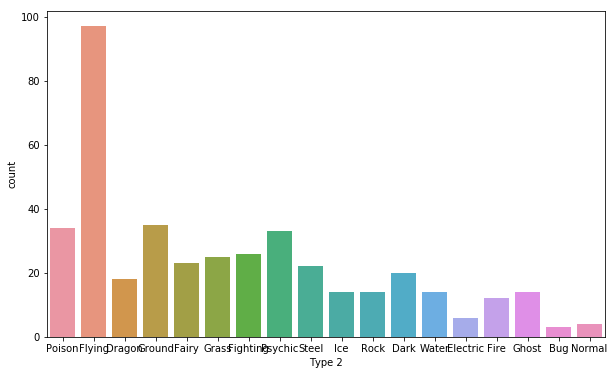

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data['Type 2'])
plt.show()

In [11]:
data=data.fillna('#####')
type_02=['Poison', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal']

In [12]:
data['Type 2']=data['Type 2'].apply(lambda x: x if x!='#####' else random.choice(type_02))

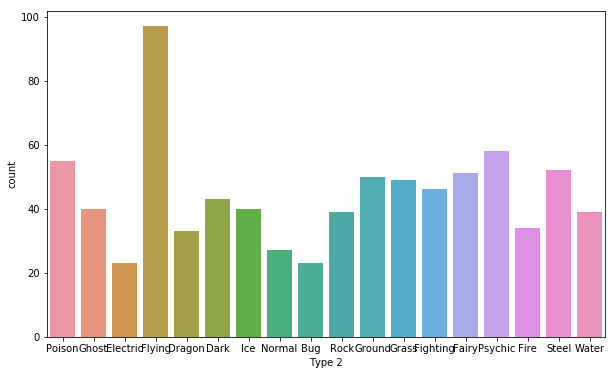

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data['Type 2'])
plt.show()

In [14]:
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,Ghost,39,52,43,60,50,65,1,False


In [15]:
data['First_pokemon']=le.fit_transform(data['Name'])

In [16]:
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,68
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,307
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,744
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,452
4,Charmander,Fire,Ghost,39,52,43,60,50,65,1,False,87


In [17]:
fight=pd.read_csv('/kaggle/input/pokemon-challenge/combats.csv')

In [18]:
print(fight.shape)
fight.head()

(50000, 3)


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [19]:
data_merged=data.merge(fight,on='First_pokemon',how='inner')

In [20]:
del data_merged['Name']

In [21]:
cat_cols=data_merged.select_dtypes(include='object')
cat_cols.head()

,Type 1,Type 2
0,Grass,Poison
1,Grass,Poison
2,Grass,Poison
3,Grass,Poison
4,Grass,Poison


In [22]:
data_merged=pd.concat([data_merged.drop(cat_cols,axis=1),cat_cols.apply(le.fit_transform)],axis=1)

In [23]:
X=data_merged.drop('Winner',axis=1)
y=data_merged['Winner']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
rf=RandomForestRegressor()

In [27]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [28]:
y_pred=rf.predict(x_test)

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y_test,y_pred)

0.6005755375074227

In [31]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [32]:
param={'n_estimators':np.arange(1,10),'min_samples_split':np.arange(2,5),'min_samples_leaf':np.arange(1,10)}

In [33]:
search=GridSearchCV(estimator=rf,param_grid=param,return_train_score=True).fit(x_train,y_train)

In [34]:
search.best_params_

{'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 9}

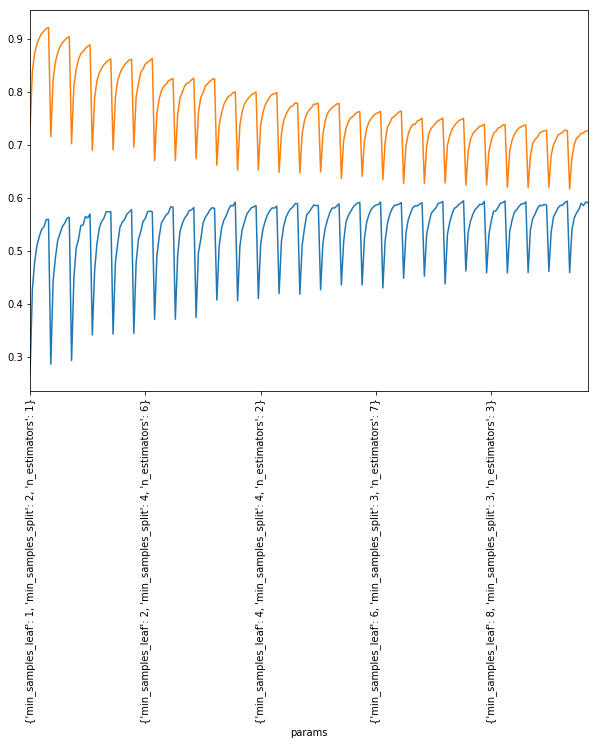

In [35]:
plt.figure(figsize=(10,7))
pd.DataFrame(search.cv_results_).set_index('params')['mean_test_score'].plot.line()
pd.DataFrame(search.cv_results_).set_index('params')['mean_train_score'].plot.line()
plt.xticks(rotation=90)
plt.show()

In [36]:
y_pred=search.predict(x_test)

In [37]:
r2_score(y_test,y_pred)

0.6220641409441903

In [38]:
from xgboost import XGBRegressor

In [39]:
xgb=XGBRegressor()

In [40]:
xgb.fit(x_train,y_train)

[15:53:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [41]:
y_pred=xgb.predict(x_test)

In [42]:
r2_score(y_test,y_pred)

0.5726521401962164